# 概率分布

## 设定概率分布并抽样

In [6]:
%matplotlib inline
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

In [3]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

In [5]:
cum_counts

tensor([[  1.,   1.,   3.,   2.,   2.,   1.],
        [  2.,   1.,   5.,   4.,   2.,   6.],
        [  4.,   1.,   7.,   5.,   6.,   7.],
        ...,
        [802., 839., 805., 854., 821., 859.],
        [804., 841., 807., 855., 822., 861.],
        [808., 842., 807., 858., 823., 862.]])

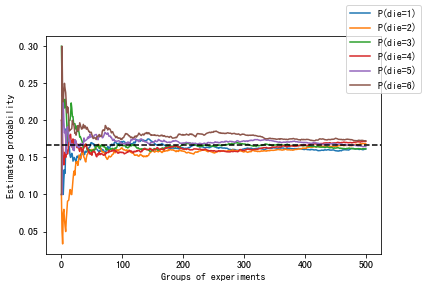

In [11]:
fig, ax = plt.subplots()
for i in range(6):
    ax.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
ax.axhline(y=0.167, color='black', linestyle='dashed')
fig.gca().set_xlabel('Groups of experiments')
fig.gca().set_ylabel('Estimated probability')
fig.legend();